# JSON

→ JSON — это простой, структурированный формат обмена данными, основанный на использовании текста.

# Модули для работы с JSON

Для работы с данными в формате JSON используется модуль json из стандартной библиотеки языка Python, который необходимо будет загрузить перед началом работы с данными, выполнив следующую команду:

Также нам может быть полезен модуль pprint  (от англ. pretty print, рус. красивый вывод на экран), а точнее — встроенная в него одноимённая функция pprint(), с помощью которой можно красиво выводить на экран содержимое JSON-файла. Для загрузки нужной нам функции перед началом работы выполним следующий код:

In [95]:
# Импортируем модуль json
import json
# Импортируем функцию pprint()
from pprint import pprint
import pandas as pd 

# КАК ВЫГЛЯДИТ JSON-ФАЙЛ?

Информация в формате JSON представляет собой (в закодированном виде) одну из двух структур:

набор пар "ключ-значение", где ключ — это всегда строковая величина (в Python такая структура преобразуется в словарь);
упорядоченный набор значений (при чтении JSON-файла в Python эта структура будет преобразована в список).
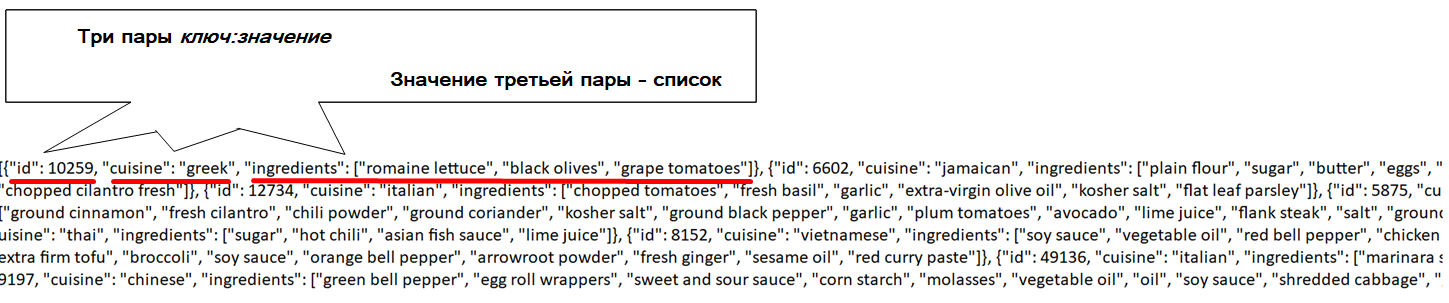

Формат JSON допускает неограниченное количество вложений этих структур друг в друга.

Давайте на примере посмотрим, что это означает. Все упражнения раздела мы будем выполнять на примере файла, содержащего информацию об ингредиентах блюд, относящихся к кухням разных народов.

✍️ Мы будем работать с сокращённой версией файла. Скачайте файл, откройте его и посмотрите на содержимое (можно использовать любой текстовый редактор, например Блокнот) . Полный датасет, содержащий более 30 000 записей о блюдах, можно найти и скачать перейдя по ссылке (требуется регистрация). Скопируйте скачанный файл recipes.json в папку, в которой будете работать (в этой же папке вы будете создавать файлы Jupyter Notebook с кодом и запускать код на выполнение).

# ОТКРЫВАЕМ JSON-ФАЙЛ

→ Чтобы перевести данные из формата JSON в формат, который можно обрабатывать инструментами Python, необходимо выполнить процедуру, которая называется десериализация (декодирование данных). Обратный процесс, связанный с переводом структур данных Python в формат JSON, называется сериализацией.

Для выполнения десериализации мы воспользуемся методом load() (от англ. загрузить) модуля json, который принимает на вход ссылку на открытый JSON-файл:

In [96]:
# Открываем файл и связываем его с объектом "f"
with open('data_json/recipes.json') as f:  
    # Загружаем содержимое открытого файла в переменную recipes  
    recipes = json.load(f)

Отлично! Теперь содержимое нашего файла загружено в переменную recipes. Давайте выведем его на экран с помощью функции pprint() из одноимённого модуля:

In [97]:
# Выводим на экран содержимое переменной recipes, используя функцию pprint()
pprint(recipes)

[{'cuisine': 'greek',
  'id': 10259,
  'ingredients': ['romaine lettuce',
                  'black olives',
                  'grape tomatoes',
                  'garlic',
                  'pepper',
                  'purple onion',
                  'seasoning',
                  'garbanzo beans',
                  'feta cheese crumbles']},
 {'cuisine': 'southern_us',
  'id': 25693,
  'ingredients': ['plain flour',
                  'ground pepper',
                  'salt',
                  'tomatoes',
                  'ground black pepper',
                  'thyme',
                  'eggs',
                  'green tomatoes',
                  'yellow corn meal',
                  'milk',
                  'vegetable oil']},
 {'cuisine': 'filipino',
  'id': 20130,
  'ingredients': ['eggs',
                  'pepper',
                  'salt',
                  'mayonaise',
                  'cooking oil',
                  'green chilies',
                  'grilled chicken bre

Итак, мы видим, что рецепт каждого из блюд описан в виде словаря, который состоит из трёх пар "ключ-значение":

Ключ "cuisine" — обозначает принадлежность блюда к определённой национальной кухне (например, 'greek', 'southern_us', 'filipino' и т. д.);
Ключ "id" — уникальный идентификационный номер блюда;
Ключ "ingredients"— содержит перечень продуктов, входящих в состав блюда.
Все рецепты (то есть все словари) хранятся в одном списке, располагаясь последовательно.

# ИЗВЛЕКАЕМ ДАННЫЕ ИЗ JSON-ФАЙЛА

После того как мы провели десериализацию данных из JSON-файла, мы можем работать с полученным объектом как с обычными списками и словарями. Единственное отличие этой работы от манипуляций с привычными нам списками и словарями заключается в том, что данных теперь больше и они помещены внутрь структуры с большим количеством уровней вложенности.

Давайте выясним некоторые детали о блюде, которое записано первым в списке блюд. Его индекс — 0, и информация о нём хранится в словаре. Чтобы узнать ID этого блюда, мы можем обратиться к соответствующему ключу словаря, выполнив следующий код:

In [98]:
recipes[0]['id']

10259

Здесь мы сначала извлекаем из списка первый элемент (индекс 0). Поскольку каждый элемент списка является словарём, для получения нужной информации о конкретном блюде нам нужно указать ключ словаря. ID блюда доступно по ключу 'id', и мы указываем этот ключ в отдельной паре квадратных скобок:

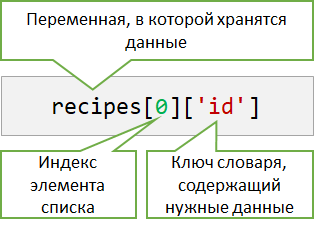

Аналогичным образом, для получения списка ингредиентов первого блюда в списке мы можем использовать тот же код, заменив в нём ключ 'id' на 'ingredients'. 

In [99]:
recipes[0]['ingredients']

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

Мы также можем извлечь информацию о конкретном блюде по его ID. Для этого необходимо с помощью цикла, например for, перебрать все элементы списка, проверяя ключ 'id',  и извлечь нужную информацию, когда мы наконец найдем нужное блюдо.

# К какой кухне относится блюдо с id = 13121?

In [100]:
# Начинаем перебор всех блюд, входящих в список
for i in recipes: 
    # Если id текущего блюда равен заданному для поиска
    if i['id'] == 13121: 
        # Выводим на экран наименование кухни, к которой относится блюдо
        print(i['cuisine']) 
        # Прерываем выполнение цикла, т.к. нужное блюдо найдено
        break

thai


На практике также иногда возникают задачи по извлечению из JSON-файла обобщённой информации. Давайте попробуем решить две такие задачи.

Какое количество уникальных национальных кухонь присутствуют в нашем наборе данных?

ВАРИАНТ РЕШЕНИЯ С ИСПОЛЬЗОВАНИЕМ СПИСКА

Чтобы извлечь эту информацию, нам нужно создать пустой список и последовательно заполнять его уникальными значениями, доступными по ключу 'cuisine' в каждом из словарей, содержащих информацию о рецептах. Поскольку словари объединены в список recipes, не получится применить известный нам метод unique() (этот метод неприменим к словарям), и для извлечения всех уникальных значений нужно перебирать элементы списка в цикле с параметром.

ВАРИАНТ РЕШЕНИЯ С ИСПОЛЬЗОВАНИЕМ МНОЖЕСТВА

Другой способ решения этой же задачи — использование для хранения данных о разных кухнях не списка, а множества (set). Множество содержит только уникальные элементы, поэтому при работе с ним нет необходимости проверять, содержится ли там тот или иной элемент. Если элемент (в нашем примере — название типа кухни) уже есть, то команда "добавить во множество такое же значение" будет проигнорирована компьютером.

In [101]:
unique_cuisines = []

for i in recipes:
    cuisine = i['cuisine']
    if cuisine not in unique_cuisines:
        unique_cuisines.append(cuisine)
print(unique_cuisines)

['greek', 'southern_us', 'filipino', 'indian', 'jamaican', 'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai', 'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese', 'irish', 'korean', 'moroccan', 'russian']


In [102]:
cuisines = set() 
# Начинаем перебор всех рецептов
for recipe in recipes:
    # Добавляем название типа кухни к множеству
    cuisines.add(recipe['cuisine']) 

# Выводим на экран полученное значение
print(len(cuisines))

20


Какой из национальных кухонь принадлежит самое большое количество рецептов?

In [103]:
# Создаём пустой список для хранения уникальных значений кухонь
cuisines = [] 

# Начинаем перебор всех рецептов
for recipe in recipes: 
    # Если тип кухни текущего блюда ещё не встречался
    if not(recipe['cuisine'] in cuisines):
        # Добавляем его к списку cuisines 
        cuisines.append(recipe['cuisine']) 

# Создаём пустой словарь для хранения информации об количествах рецептов в каждой кухне
valreccuisine = {} 

# Перебираем список кухонь
for item in cuisines: 
    # Добавляем в словарь ключ, соответствующий очередной кухне
    valreccuisine[item] = 0 

# Перебираем список рецептов
for recipe in recipes: 
    # Увеличиваем значение нужного ключа в словаре на 1
    valreccuisine[recipe['cuisine']] += 1 

# Извлекаем значения для всех ключей используя метод get(), выбираем самое максимальное значение (при наличии одинаковых значений будет выбрано первое в словаре) и выводим на экран ключ максимального значения
print(max(valreccuisine, key=valreccuisine.get))

italian


# ИЗ JSON В PANDAS

In [104]:
# Создаём объект DataFrame из списка recipes
df = pd.DataFrame(recipes) 
# Выводим на экран первые строки полученного DataFrame
display(df.head())

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


ДОПОЛНИТЕЛЬНО
Для непосредственного считывания содержимого файла recipes.json в переменную df (объект DataFrame) используйте функцию read_json() (с англ. читать_json).
Создаём объект DataFrame, загружая содержимое файла recipes.json

df = pd.read_json('recipes.json') 

Выводим на экран первые строки полученного DataFrame

display(df.head())

Такая структура не очень практична, поскольку она не позволяет осуществлять группировку данных и выполнять многие другие операции, связанные с исследованием ингредиентов разных блюд. Например, представьте, что вы хотите отфильтровать блюда, состоящие не более чем из пяти ингредиентов, или блюда, не содержащие мяса. Сделать это, когда ингредиенты блюд хранятся в списках, не очень просто.

Для полноценной работы с данными нам необходимо иметь возможность хранить информацию о каждом ингредиенте в отдельном столбце, например:

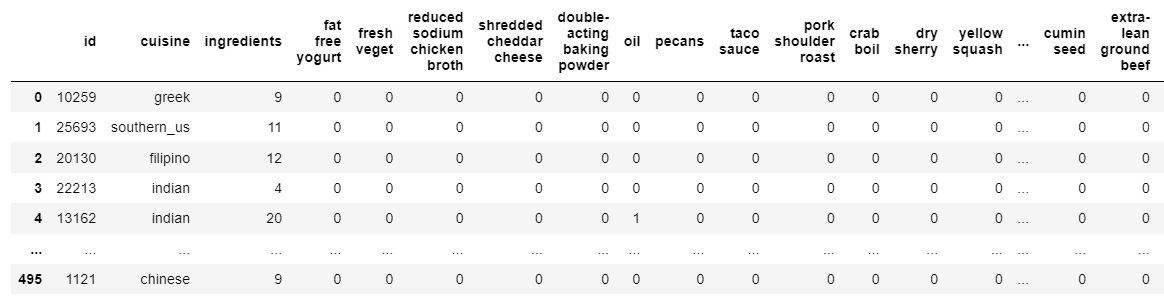

Давайте шаг за шагом преобразуем DataFrame в такой вид.

Работу над преобразованием DataFrame начнём с создания и заполнения столбцов, содержащих сведения о наличии или отсутствии каждого ингредиента в рецепте. Процесс заполнения выполним в два этапа:

1
Создадим функцию для заполнения значения в каждой ячейке. Функция будет проверять наличие конкретного ингредиента в столбце ingredients для текущего блюда и возвращать 1, если ингредиент есть в рецепте, и 0, если он отсутствует.

2
Организуем цикл, в котором будем перебирать наименования всех ингредиентов DataFrame (для этого потребуется создать реестр, то есть некий список, который содержит уникальные наименования ингредиентов). Для каждого ингредиента создадим в DataFrame столбец с соответствующим названием и заполним его единицами и нулями, применив к DataFrame, а точнее к столбцу ingredients функцию, созданную нами на предыдущем этапе.

In [105]:
# Создаем пустое множество для хранения реестра уникальных ингредиентов
all_ingredients=set() 

# Начинаем перебор всех блюд входящих в список
for recipe in recipes: 
    # Начинаем перебор всех ингредиентов входящих в состав текущего блюда
    for ingredient in recipe['ingredients']: 
        # Добавляем уникальный ингредиент в реестр
        all_ingredients.add(ingredient ) 

# Выводим на экран количество уникальных ингредиентов из реестра
print(len(all_ingredients))

1318


→ Теперь определим функцию contains(), с помощью которой мы будем проверять наличие конкретного ингредиента ingredient_name в рецепте текущего блюда, который представлен списком ingredient_list (значение в ячейке столбца ingredients текущего рецепта).

In [106]:
# Определяем имя функции и передаваемые аргументы    
def contains(ingredient_list): 
    # Если ингредиент есть в текущем блюде,
    if all_ingredients in ingredient_list:   
        # возвращаем значение 1
        return 1 
    # Если ингредиента нет в текущем блюде,
    else: 
        # возвращаем значение 0
        return 0

In [107]:
# Последовательно перебираем ингредиенты в реестре all_ingredients
for ingredient_name in all_ingredients: 
    # В DataFrame cоздаем столбец с именем текущего ингредиента 
    # и заполняем его единицами и нулями,
    # используя ранее созданную функцию contains
    df[ingredient_name] = df['ingredients'].apply(contains)

C:\Users\User\AppData\Local\Temp\ipykernel_22916\547553155.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ingredient_name] = df['ingredients'].apply(contains)
C:\Users\User\AppData\Local\Temp\ipykernel_22916\547553155.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ingredient_name] = df['ingredients'].apply(contains)
C:\Users\User\AppData\Local\Temp\ipykernel_22916\547553155.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor pe

In [108]:
# Заменяем список ингредиентов в рецепте на их количество 
df['ingredients'] = df['ingredients'].apply(len) 
# Выводим содержимое полученного DataFrame на экран
display(df)

,id,cuisine,ingredients,mint,wheat,shredded cheddar cheese,chipotle peppers,fennel bulb,unsweetened coconut milk,cilantro,...,thai green curry paste,bread,mustard,"green bell pepper, slice",tuna steaks,chopped fresh chives,italian style rolls,boneless skinless chicken breasts,corn oil,salad
0,10259,greek,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1121,chinese,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,18376,italian,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,17815,italian,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,32878,southern_us,19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# СОХРАНЯЕМ DATAFRAME В CSV-ФАЙЛЕ

Если мы планируем продолжать работать с DataFrame, созданными на основе данных, которые мы получили в JSON-формате, то полезно будет сохранить промежуточный DataFrame в виде CSV-файла. Для выполнения этой операции воспользуемся известной нам в Pandas функцией to_csv().

В качестве основного параметра мы указали имя файла, в котором необходимо сохранить данные. Также мы установили значение параметра index как False. Такая настройка позволит нам не сохранять индексы строк в виде отдельного столбца; в результате не будут загружаться «лишние» данные при открытии файла при помощи функции read_csv().

In [109]:
# df.to_csv('data/recipes.csv', index = False)

# ИЗ PANDAS В JSON

→ Решим обратную задачу и создадим JSON-файл из сохранённого ранее CSV-файла, который получили в конце предыдущего этапа. 

In [110]:
# Создаём DataFrame, читаем данные из файла в переменную df
df = pd.read_csv('data/recipes.csv')
display(df)

,id,cuisine,ingredients,sherry,coconut milk,fat skimmed chicken broth,slaw mix,organic sugar,ground cayenne pepper,myzithra,...,plain flour,fresh asparagus,bay leaves,fat-free refried beans,quinoa,starchy potatoes,rice wine,fresh thyme leaves,finely chopped fresh parsley,haricots verts
0,10259,greek,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1121,chinese,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,18376,italian,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,17815,italian,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,32878,southern_us,19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Напишите код для создания списка id всех блюд, нужны только уникальные значения представленных в DataFrame. Результирующий список занесите в переменную ids.

In [111]:
ids = list(df['id'].unique())

Напишите код для создания списка ингредиентов всех блюд, представленных в DataFrame. Результирующий список занесите в переменную ingredients.

In [112]:
ingredients=list(df.columns)[3:]

→ Теперь мы можем использовать подготовленные списки ids и ingredients для непосредственного создания JSON-структуры.

После десериализации JSON-файла мы получили структуру, представляющую собой список, состоящий из словарей. Каждый словарь состоял из трёх пар "ключ-значение", при этом в качестве значений выступали:
- целое число (id блюда);
- строковая величина (тип кухни);
- список строковых величин (перечень ингредиентов).

Сейчас нам предстоит воссоздать эту структуру, извлекая данные из DataFrame. Для этого необходимо создать:
- пустой список new_recipes — для хранения итоговой структуры;
- используя код из Задачи 7.1, список ids — для хранения id всех блюд;
- используя код из Задачи 7.2, список ingredients — для хранения названий всех ингредиентов.

✍️ Далее необходимо реализовать следующий алгоритм:

Написать код функции make_list(), которая принимает на вход строку DataFrame df, содержащую полные данные об одном блюде (в виде Series), и возвращает перечень ингредиентов, входящих в состав этого блюда (в виде списка).\
Организовать цикл с параметром, в котором будут перебираться элементы списка ids. В результате в процессе прохождения цикла параметр должен принять значение id каждого блюда.\
На каждом шаге цикла создать словарь, содержащий три пары "ключ-значение":
- ключу "id" присвоить текущее значение параметра цикла как целого числа;
- ключу "cuisine" присвоить значение соответствующей кухни, которое мы получим, применив фильтр по текущему id к DataFrame df;
- ключу "ingredients" присвоить значение списка, воспользовавшись функцией make_list(), созданной на первом шаге алгоритма.

Каждый созданный словарь добавить к списку new_recipes:

In [113]:
def make_list(ingredients_series):
    """
    Функция принимает Series с ингредиентами и возвращает список ингредиентов.
    """
    return ingredients_series.tolist() if isinstance(ingredients_series, (list, pd.Series)) else []

# Список идентификаторов всех блюд
ids = df['id'].unique()
# Создаём пустой список для хранения итоговой структуры
new_recipes = [] 
# Организуем цикл с параметром current_id
for current_id in ids: 
    # Получаем значение соответствующей кухни, применив фильтр по текущему значению параметра цикла к DataFrame;
    cuisine = df[df['id'] == current_id]['cuisine'].iloc[0] 
    # Получаем перечень ингредиентов, входящих в состав текущего блюда
    current_ingredients = make_list(df[df['id'] == current_id]) 
    # Создаём текущий словарь
    current_recipe = {'cuisine': cuisine, 'id': int(current_id), 'ingredients': current_ingredients} 
    # Добавляем созданный словарь к списку
    new_recipes.append(current_recipe)

Напишите код функции make_list(), которая принимает на вход одну строку DataFrame, содержащую данные об одном рецепте (в виде Series), и возвращает перечень ингредиентов этого блюда (в виде списка).

Функция make_list() должна принимать только один аргумент - row. Это будет строка датафрейма.

Не забудьте импортировать необходимые бибилиотеки, считать файл recipes.csv и создать список ingredients.

In [114]:

# Создаем список уникальных значений ингредиентов
ingredients = list(df.columns)[3:]

# Определяем имя функции и передаваемые аргументы
def make_list(row): 
    # Создаем пустой список ингредиентов текущего блюда
    ingredient_list=[] 
    # Последовательно перебираем ингредиенты из реестра
    for ingredient in ingredients: 
        # Если текущий ингредиент входит в состав текущего блюда
        if row[ingredient].item()==1: 
            # Добавляем ингредиент в список ингредиентов текущего блюда
            ingredient_list.append(ingredient) 
    # Возвращаем сформированный список ингредиентов
    return ingredient_list

In [116]:
# # Функция dumps() модуля json сериализирует объект Python в строку формата JSON. 
# new_recipes = json.dumps(new_recipes)
# # Откроем файл new_recipes.json для записи
# with open("data/new_recipes.json", "w") as write_file: 
#     # Записываем содержимое подготовленные данные в файл
#     write_file.write(new_recipes)